> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>




<a id='intro'></a>
## Introduction

> The data set I have used in my project is tmbd-movies data set. There are many features in this data set whereas i have used the following features in my project are id, popularity,budget, revenue, original_title, cast, director, runtime, genre, production_companies, vote_count, release date

The questions I have analyzed are as follows:


1.Which movie made the highest profit?


2.Which movie had the highest budget ?


3.Which movie had the lowest profit?


4.Most movies released in which year?


5.How many movies are produced in each genre?


6.What is the relation between budget and profit?

In [123]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matpltlib inline
import seaport as sns



UsageError: Line magic function `%matpltlib` not found.


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [90]:
#reading csv file
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [91]:
# to get the number of rows and columns 
df.shape


(10866, 21)

In [92]:
#to get the maximum,minimum, std and mean values
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [93]:
# to find the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [94]:
#number of unique features present
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [95]:
#to drop the unwanted features
delcell = ['budget_adj','revenue_adj','imdb_id','homepage','tagline','keywords','overview','vote_average','release_date']
df = df.drop(delcell,axis = 1)

In [96]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,2015


In [97]:
#to get duplicates
sum (df.duplicated())

1

In [98]:
#to drop duplicates
df.drop_duplicates(inplace=True)

In [99]:
#replace zeros with nan
column=['budget','revenue']
df[column]=df[column].replace(0,np.nan)

In [100]:
#drop nas
df.dropna(subset=column,inplace=True)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 12 columns):
id                      3854 non-null int64
popularity              3854 non-null float64
budget                  3854 non-null float64
revenue                 3854 non-null float64
original_title          3854 non-null object
cast                    3850 non-null object
director                3853 non-null object
runtime                 3854 non-null int64
genres                  3854 non-null object
production_companies    3808 non-null object
vote_count              3854 non-null int64
release_year            3854 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 391.4+ KB


In [102]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,2015


In [103]:
df.drop('profit',axis = 1)

ValueError: labels ['profit'] not contained in axis

In [104]:
#computing profit
x = df['revenue'] - df['budget']
#inserting it in the 4th column
df.insert(4,'profit',x)
df.head()

,id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,vote_count,release_year
0,135397,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,2015
1,76341,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,2015
2,262500,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,2015
3,140607,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,2015
4,168259,9.335014,190000000.0,1.506249e+09,1.316249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,2015


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### WHICH MOVIE MADE THE HIGHEST PROFIT?

In [105]:
#to find the highest
def func(variables):
    large = df[variables].idxmax()
    large_info = pd.DataFrame(df.loc[large])
    return large_info


In [106]:
#To get total info on the high profit movie
func('profit')

,1386
id,19995
popularity,9.43277
budget,2.37e+08
revenue,2.78151e+09
profit,2.54451e+09
original_title,Avatar
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,James Cameron
runtime,162
genres,Action|Adventure|Fantasy|Science Fiction


### WHICH MOVIE HAD THE HIGHEST BUDGET?

In [117]:
func('budget')

,2244
id,46528
popularity,0.25054
budget,4.25e+08
revenue,1.10876e+07
profit,-4.13912e+08
original_title,The Warrior's Way
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Sngmoo Lee
runtime,100
genres,Adventure|Fantasy|Action|Western|Thriller


### WHICH MOVIE HAD THE LOWEST PROFIT?

In [121]:
#to find the lowest
def func(variables):
    low = df[variables].idxmin()
    low_info = pd.DataFrame(df.loc[low])
    return low_info

In [122]:
#To get total info on the low profit movie
func('profit')

,2244
id,46528
popularity,0.25054
budget,4.25e+08
revenue,1.10876e+07
profit,-4.13912e+08
original_title,The Warrior's Way
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Sngmoo Lee
runtime,100
genres,Adventure|Fantasy|Action|Western|Thriller


### MOST MOVIES RELEASED IN WHICH PERIOD?

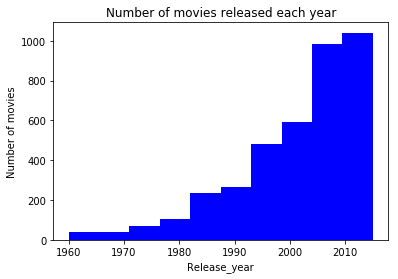

In [107]:
#to plot movies vs release year graph
x = df['release_year']
plt.ylabel('Number of movies')
plt.xlabel('Release_year')
plt.title('Number of movies released each year')
plt.hist(x,color = 'b');


It can be found that most movies are released between the year 2009 to 2014.

### HOW MANY MOVIES ARE PRODUCED IN EACH GENRE?

In [113]:
#splitting the string and then making it a series
def gen(cols):
    gen = df[cols].str.cat(sep='|')
    gen = pd.Series(gen.split('|'))
#computing the count of variables
    gen_num = gen.value_counts()
    return gen_num

In [114]:
#to cal the function
gen_num = gen('genres')
gen_num

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64

The most movies have drama genre. Comedy, thriller and action movies are also produced in large movies.

### WHAT IS THE RELATION BETWEEN BUDGET AND PROFIT?

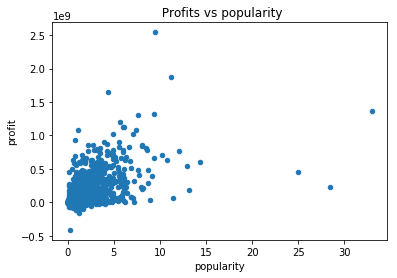

In [110]:
df.plot(x='popularity',y='profit',title = ' Profits vs popularity',kind='scatter');

It can be seen that the profit increases as the popularity increases but it can be also seen that there are some outliers present in it.

<a id='conclusions'></a>
## Conclusions
 According to my analysis, I have found that 
 
 1.AVATAR movie has made the highest profit.
 
 2.The movie that had the highest budget was the Warrior's way
 
 3.The Warrior's way was the movie that had the lowest profit despite of high budget.
 
 4.More number of movies are produced in the genere drama and comedy.
 
 5.Most movies are released in the year 2009 to 2014.
 
 6.The profit increases as the popularity increases but it can be also seen that there are some outliers present.
 

## LIMITATIONS
The data has certain missing values and there are certain zeros in the data resulting in dropping certain columns.We also dont kno whether the data is up-to-date or not. 



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])